## 範例重點
* 知道如何在 keras 中加入 dropout
* 了解 dropout 中 ratio 的意義與對訓練的影響

In [8]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.20, 0.25,0.30,0.35]

num_neurons2=[512, 256, 128, 64, 32]

In [14]:
results = {}

for do_rate in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=do_rate)
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "drop_rate-%s" % str(do_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 6s 112us/step - loss: 1.2911 - acc: 0.5386 - val_loss: 1.3514 - val_acc: 0.5196
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2894 - acc: 0.5380 - val_loss: 1.3617 - val_acc: 0.5136
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
________

Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4001 - acc: 0.4969 - val_loss: 1.3938 - val_acc: 0.5048
Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3897 - acc: 0.4999 - val_loss: 1.3811 - val_acc: 0.5061
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3912 - acc: 0.4977 - val_loss: 1.3821 - val_acc: 0.5080
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

50000/50000 [==============================] - 6s 113us/step - loss: 1.5013 - acc: 0.4614 - val_loss: 1.4661 - val_acc: 0.4806
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.4901 - acc: 0.4628 - val_loss: 1.4843 - val_acc: 0.4717
Epoch 48/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.4934 - acc: 0.4597 - val_loss: 1.4587 - val_acc: 0.4840
Epoch 49/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4923 - acc: 0.4647 - val_loss: 1.4755 - val_acc: 0.4686
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4913 - acc: 0.4639 - val_loss: 1.4625 - val_acc: 0.4783
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)             

Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5656 - acc: 0.4369 - val_loss: 1.5318 - val_acc: 0.4624
Epoch 46/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5667 - acc: 0.4351 - val_loss: 1.5352 - val_acc: 0.4623
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5628 - acc: 0.4373 - val_loss: 1.5136 - val_acc: 0.4686
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5650 - acc: 0.4369 - val_loss: 1.4983 - val_acc: 0.4702
Epoch 49/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5574 - acc: 0.4373 - val_loss: 1.5153 - val_acc: 0.4689
Epoch 50/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5558 - acc: 0.4396 - val_loss: 1.5292 - val_acc: 0.4657
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None

50000/50000 [==============================] - 6s 114us/step - loss: 1.6231 - acc: 0.4167 - val_loss: 1.5667 - val_acc: 0.4499
Epoch 44/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6275 - acc: 0.4156 - val_loss: 1.5758 - val_acc: 0.4490
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6242 - acc: 0.4147 - val_loss: 1.5504 - val_acc: 0.4593
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6196 - acc: 0.4181 - val_loss: 1.5695 - val_acc: 0.4519
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6221 - acc: 0.4143 - val_loss: 1.5935 - val_acc: 0.4469
Epoch 48/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6162 - acc: 0.4186 - val_loss: 1.5578 - val_acc: 0.4598
Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6167 - acc: 0.4167 - val_loss: 1.5693 - val_acc: 0.4596
Epoch 50/50
50000/50000 [==============

In [15]:
for do_rate in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons2,drp_ratio=do_rate)
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "n2_drop_rate-%s" % str(do_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
__________

Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4145 - acc: 0.4970 - val_loss: 1.4401 - val_acc: 0.4848
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4230 - acc: 0.4959 - val_loss: 1.4003 - val_acc: 0.5013
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4148 - acc: 0.4971 - val_loss: 1.3966 - val_acc: 0.5031
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4070 - acc: 0.5027 - val_loss: 1.4313 - val_acc: 0.4927
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4029 - acc: 0.5008 - val_loss: 1.4312 - val_acc: 0.4911
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512) 

Epoch 41/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6015 - acc: 0.4348 - val_loss: 1.5435 - val_acc: 0.4591
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6080 - acc: 0.4293 - val_loss: 1.5513 - val_acc: 0.4499
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5955 - acc: 0.4327 - val_loss: 1.5388 - val_acc: 0.4581
Epoch 44/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5958 - acc: 0.4348 - val_loss: 1.5417 - val_acc: 0.4572
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5996 - acc: 0.4291 - val_loss: 1.5328 - val_acc: 0.4545
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5941 - acc: 0.4335 - val_loss: 1.5429 - val_acc: 0.4506
Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5895 - acc: 0.4375 - val_loss: 1.5285 - val_acc: 0.4590
Epoch 48/50
50000/50000 [==

Epoch 36/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6807 - acc: 0.3943 - val_loss: 1.6165 - val_acc: 0.4294
Epoch 37/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6774 - acc: 0.3976 - val_loss: 1.5826 - val_acc: 0.4354
Epoch 38/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6702 - acc: 0.3997 - val_loss: 1.5921 - val_acc: 0.4418
Epoch 39/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6697 - acc: 0.4021 - val_loss: 1.5924 - val_acc: 0.4347
Epoch 40/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6670 - acc: 0.3969 - val_loss: 1.5774 - val_acc: 0.4385
Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6769 - acc: 0.3994 - val_loss: 1.5754 - val_acc: 0.4371
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6603 - acc: 0.4023 - val_loss: 1.5680 - val_acc: 0.4455
Epoch 43/50
50000/50000 [==

Epoch 31/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7990 - acc: 0.3378 - val_loss: 1.7393 - val_acc: 0.3709
Epoch 32/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7987 - acc: 0.3379 - val_loss: 1.7231 - val_acc: 0.3758
Epoch 33/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7915 - acc: 0.3424 - val_loss: 1.7009 - val_acc: 0.3877
Epoch 34/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7902 - acc: 0.3436 - val_loss: 1.7716 - val_acc: 0.3579
Epoch 35/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7905 - acc: 0.3421 - val_loss: 1.7249 - val_acc: 0.3743
Epoch 36/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7820 - acc: 0.3442 - val_loss: 1.7361 - val_acc: 0.3661
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7820 - acc: 0.3446 - val_loss: 1.7185 - val_acc: 0.3795
Epoch 38/50
50000/50000 [==

Epoch 26/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9046 - acc: 0.2818 - val_loss: 1.8523 - val_acc: 0.3087
Epoch 27/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8993 - acc: 0.2815 - val_loss: 1.8816 - val_acc: 0.3039
Epoch 28/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9020 - acc: 0.2806 - val_loss: 1.9022 - val_acc: 0.2898
Epoch 29/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9023 - acc: 0.2797 - val_loss: 1.8734 - val_acc: 0.3122
Epoch 30/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8957 - acc: 0.2850 - val_loss: 1.8624 - val_acc: 0.3146
Epoch 31/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8946 - acc: 0.2828 - val_loss: 1.8813 - val_acc: 0.3132
Epoch 32/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8875 - acc: 0.2824 - val_loss: 1.8447 - val_acc: 0.3214
Epoch 33/50
50000/50000 [==

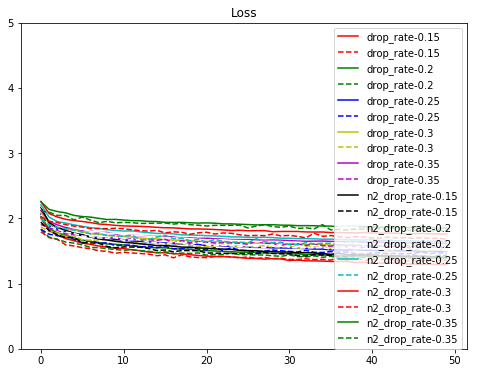

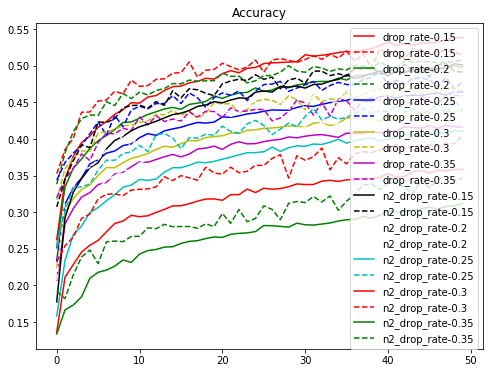

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","w","c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%8])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%8])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果